# Треугольная решетка

У треугольной решётки заданы периодические граничные условия. Треугольная решётка может быть представлена в виде графа:

(0, 0) (1, 0) (9, 0) (0, 1) (0, 9) (1, 1)
(0, 1) (1, 1) (9, 1) (0, 2) (1, 2)
(0, 2) (1, 2) (9, 2) (0, 3) (1, 3)
(0, 3) (1, 3) (9, 3) (0, 4) (1, 4)
(0, 4) (1, 4) (9, 4) (0, 5) (1, 5)
(0, 5) (1, 5) (9, 5) (0, 6) (1, 6)
(0, 6) (1, 6) (9, 6) (0, 7) (1, 7)
(0, 7) (1, 7) (9, 7) (0, 8) (1, 8)
(0, 8) (1, 8) (9, 8) (0, 9) (1, 9)
(0, 9) (1, 9) (9, 9)
(1, 0) (2, 0) (1, 1) (1, 9) (2, 1)
(1, 1) (2, 1) (1, 2) (2, 2)
(1, 2) (2, 2) (1, 3) (2, 3)
(1, 3) (2, 3) (1, 4) (2, 4)
(1, 4) (2, 4) (1, 5) (2, 5)
(1, 5) (2, 5) (1, 6) (2, 6)
(1, 6) (2, 6) (1, 7) (2, 7)
(1, 7) (2, 7) (1, 8) (2, 8)
(1, 8) (2, 8) (1, 9) (2, 9)
(1, 9) (2, 9)
(2, 0) (3, 0) (2, 1) (2, 9) (3, 1)
(2, 1) (3, 1) (2, 2) (3, 2)
(2, 2) (3, 2) (2, 3) (3, 3)
(2, 3) (3, 3) (2, 4) (3, 4)
(2, 4) (3, 4) (2, 5) (3, 5)
(2, 5) (3, 5) (2, 6) (3, 6)
(2, 6) (3, 6) (2, 7) (3, 7)
(2, 7) (3, 7) (2, 8) (3, 8)
(2, 8) (3, 8) (2, 9) (3, 9)
(2, 9) (3, 9)
(3, 0) (4, 0) (3, 1) (3, 9) (4, 1)
(3, 1) (4, 1) (3, 2) (4, 2)
(3, 2) (4, 2) (3, 3) (4, 3)
(3, 3) (4, 3) (3, 4)

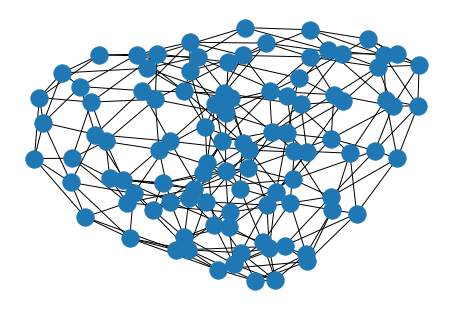

In [189]:
n=10
import sys

import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_graph(dim=[n,n], periodic = True)  # 5x5 grid

Edges = []
for j in range(n-1):
    for i in range(n-1):
        Edges.append(((i,j),(i+1,j+1)))
                     
G.add_edges_from(Edges)

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

Однако, топологически, эту решётку можно представить в виде массива. размерности N*N с соответствующими связями и граничными условиями.

# План реализации
1) Задать решётку n*n и установить начальное состояние случайным образом, расположив до 4 частиц в один узел
2) Производить рассчет новых состояний, возникающих при столкновениях с учетом Правил* и граничных условий
3) Повторять рассчеты N раз

* Правила были взяты из статьи Frish, d Humieres, Hasslacher, Lallemand, Pomeau, Rivet, "Lattice Gas Hydrodynamics in Two and Three Dimensions" (1987, Complex System Publications, Inc)

In [136]:
#  Лист соответствий между состояниями.

List =   ['0000000','0000001','0000010','1000100','0000100','0001010','0000110','0000111','0001000','0010100','0000101',
        ['1001100', '0010110'],'0001100','0001101','0001110','0001111','0010000','0101000',
        ['0100100', '1001000'],
        ['0100101', '1001001', '1010100', '0101010'],'0001001',
        ['0011010', '0101100'],'1001100',
        ['1001101', '0101110'],'0011000','0011001','0101100',
        ['1011100', '0101101'],'0011100','0011101','0011110','0011111','0100000','1010000','1000001',
        ['1100100', '1010010'],
        ['0010010', '1001000'],
        ['0010011', '1001001', '1010100', '0101010'],'1001010',
        ['1001011', '1010110'],'0010001',
        ['0110100', '1011000'],'1010100','1010101','0011010',
        ['1011100', '0011011'],
        ['1001101', '0010111'],'1011100','0110000','0110001','1101000','1110100','1011000',
        ['0111010', '1011001'],
        ['1101100', '1011010'],
        ['1101101', '1011011'],'0111000','0111001',
        ['1011001', '0110101'],'1111100','0111100','0111101','1011101','0111111','1000000','0100010','1000010','1000011','0000011',
        ['1001010', '0100110'],'1000110','1000111',
        ['0100100', '0010010'],
        ['0010011', '0100101', '1010100', '0101010'],'0100110',
        ['1010110', '0100110'],'0010110',
        ['0010111', '0101110'],'1001110','1001111','0100001',
        ['1101000', '0110010'],'1100100',
        ['1101010', '1100101'],'0101010','0101011',
        ['1001011', '0100111'],'1101110','0110100',
        ['0111010', '0110101'],
        ['1101100', '0110110'],
        ['1101101', '0110111'],
        ['0101101', '0011011'],'0111110','0101111','0111111','1100000','1100001','1100010','1100011','1010010','1101010','1100110','1100111','0110010',
        ['1110100', '0110011'],
        ['1100101', '1010011'],'1110110',
        ['0110110', '1011010'],
        ['0110111', '1011011'],'1010111','1101111','1110000','1110001','1110010','1110011',
        ['0110011', '1101001'],'1111010','1101011','1110111','1111000','1111001','1110101','1111011','1111011','1111101','1111110','1111111'
]

In [137]:
import numpy as np

def get_state(Str,i,j):
    # Задаёт состояние системы (решётки)
    #
    # Str - код состояния узла
    # i - номер строки узла
    # j - номер столбца узла
    Final_state = (
        str(Str[i-1,j-1][0]) +
        str(Str[i-1,j][1]) +
        str(Str[i,j+1][2]) +
        str(Str[i+1,j+1][3]) +
        str(Str[i+1,j][4]) +
        str(Str[i,j-1][5]) +
        str(Str[i,j][6])
    )
    return int(Final_state,2)

def get_new_state(List, i):
    # Обновление состояния системы после столкновения частиц
    # 
    # List - (str) список кодов состояний системы
    # i - номер позиции в List
    #
    if np.isscalar(List[i])==False:
        return np.random.choice(List[i])
    else:
        return List[i]
    
def get_start_state(Len, dots=4):
    # Создание начальной конфигурации системы(случайная матрица Len*Len)
    #
    # Len - размерность матрицы(R^2)
    # dots - максимальное число частиц в узле
    #
    return np.array([str(get_random_dots(dots)) for _ in range(Len*Len)], dtype='str').reshape(l,-1)

def get_random_dots(dots):
    # Создание листа из кодов случайных чисел 
    # 
    # dots - максимальное число частиц в узле
    #
    d = np.random.randint(0,dots+1)
    num = d*'1'+(7-d)*'0'
    char_list = list(num)
    np.random.shuffle(char_list)
    return ''.join(char_list)

def get_lattice_density(state):
    # Рассчет плотности в узле решётки
    #
    # state - узел
    #
    return np.array([list(state.reshape(-1)[x]).count('1') for x in range(l*l)]).reshape(l,-1)

In [139]:
l = 10 # Размерность решётки

N = 1000 # Число обновлений системы (итераций)

state = get_start_state(l) # Начальное состояние
print('Initial state\n', get_lattice_density(state),'\n')

for _ in range(N):
    a = np.concatenate((state[l-1].reshape(1,l), state, state[0].reshape(1,l)), axis=0) # add last line to TOP, first to BOTTOM
    pstate = np.concatenate((a[:,-1].reshape(l+2,1),a,a[:,0].reshape(l+2,1)), axis=1)   # add left line to RIGHT, last to LEFT
    for i in range(1,l+1):
        for j in range(1,l+1):
            state[i-1,j-1]=get_new_state(List, get_state(pstate,i,j))
print('Final state\n',get_lattice_density(state))

Initial state
 [[4 0 1 3 1 1 0 3 0 4]
 [1 4 4 3 0 4 0 1 2 4]
 [4 2 3 2 2 0 0 4 4 3]
 [4 0 4 0 3 2 0 4 2 0]
 [3 4 3 3 3 4 2 3 2 3]
 [0 2 2 4 1 4 2 4 0 4]
 [1 3 2 3 1 4 1 1 4 3]
 [0 0 2 4 3 1 3 2 4 3]
 [4 2 1 3 3 0 4 3 0 0]
 [1 3 2 3 2 0 0 3 4 4]] 

Final state
 [[1 3 3 1 3 3 2 2 4 2]
 [3 3 3 2 2 4 4 1 1 4]
 [3 1 2 3 1 3 1 2 3 4]
 [3 3 1 3 4 4 3 1 2 4]
 [0 2 2 2 3 1 2 3 3 3]
 [1 3 2 0 3 2 2 1 3 3]
 [3 3 0 2 5 3 0 3 1 3]
 [2 2 1 4 3 1 3 3 3 2]
 [0 0 2 3 3 1 2 0 2 3]
 [0 3 4 2 2 2 1 3 1 3]]


(0, 0) (1, 0) (0, 1) (1, 1)
(0, 1) (1, 1) (0, 2) (1, 2)
(0, 2) (1, 2) (0, 3) (1, 3)
(0, 3) (1, 3) (0, 4) (1, 4)
(0, 4) (1, 4) (0, 5) (1, 5)
(0, 5) (1, 5) (0, 6) (1, 6)
(0, 6) (1, 6) (0, 7) (1, 7)
(0, 7) (1, 7) (0, 8) (1, 8)
(0, 8) (1, 8) (0, 9) (1, 9)
(0, 9) (1, 9)
(1, 0) (2, 0) (1, 1) (2, 1)
(1, 1) (2, 1) (1, 2) (2, 2)
(1, 2) (2, 2) (1, 3) (2, 3)
(1, 3) (2, 3) (1, 4) (2, 4)
(1, 4) (2, 4) (1, 5) (2, 5)
(1, 5) (2, 5) (1, 6) (2, 6)
(1, 6) (2, 6) (1, 7) (2, 7)
(1, 7) (2, 7) (1, 8) (2, 8)
(1, 8) (2, 8) (1, 9) (2, 9)
(1, 9) (2, 9)
(2, 0) (3, 0) (2, 1) (3, 1)
(2, 1) (3, 1) (2, 2) (3, 2)
(2, 2) (3, 2) (2, 3) (3, 3)
(2, 3) (3, 3) (2, 4) (3, 4)
(2, 4) (3, 4) (2, 5) (3, 5)
(2, 5) (3, 5) (2, 6) (3, 6)
(2, 6) (3, 6) (2, 7) (3, 7)
(2, 7) (3, 7) (2, 8) (3, 8)
(2, 8) (3, 8) (2, 9) (3, 9)
(2, 9) (3, 9)
(3, 0) (4, 0) (3, 1) (4, 1)
(3, 1) (4, 1) (3, 2) (4, 2)
(3, 2) (4, 2) (3, 3) (4, 3)
(3, 3) (4, 3) (3, 4) (4, 4)
(3, 4) (4, 4) (3, 5) (4, 5)
(3, 5) (4, 5) (3, 6) (4, 6)
(3, 6) (4, 6) (3, 7) (4, 7)
(3, 7)

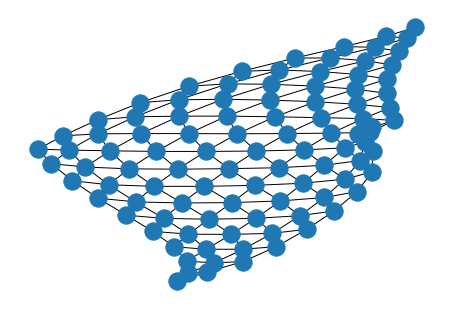

In [187]:
n=10
import sys

import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_graph(dim=[n,n], periodic = False)  # 5x5 grid

Edges = []
for j in range(n-1):
    for i in range(n-1):
        Edges.append(((i,j),(i+1,j+1)))
                     
G.add_edges_from(Edges)

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

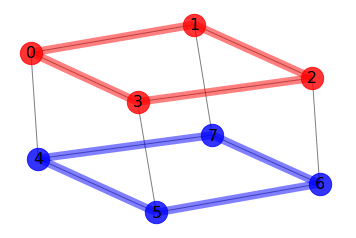

In [166]:
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(G, pos,
                       edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
                       width=8, alpha=0.5, edge_color='b')


# some math labels
labels = {}
for i in range(8):
    labels[i] = i

nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()